In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

## 서울시 소방서 & 안전센터 위치정보

#### csv 파일 불러오기

In [2]:
df_fire = pd.read_csv('firestation.csv', encoding='UTF-8')
df_safe = pd.read_csv('safecenter.csv', encoding='UTF-8')

In [3]:
df_fire.head(3)

,순번,서소코드,방면코드,중앙점X좌표,중앙점Y좌표,서소이름,위도,경도
0,1,76236,3,192393.0395,446800.6215,영등포소방서,37.520641,126.913924
1,2,75236,2,204477.7145,453806.6780,동대문소방서,37.583794,127.050688
2,3,74236,1,198315.5220,447956.7890,용산소방서,37.531106,126.980942


In [4]:
df_safe.head(3)

,고유번호,센터ID,센터명,위도,경도
0,21,1121101,양천119안전센터,37.527161,126.869452
1,22,1122101,신내119안전센터,37.610246,127.096473
2,42,1115104,서초119안전센터,37.487773,127.017145


#### column drop & rename -> concat

In [5]:
df_fire = df_fire.drop(df_fire.columns[[0,1,2,3,4]], axis=1)
df_safe = df_safe.drop(df_safe.columns[[0,1]], axis=1)

In [6]:
df_fire.rename(columns={"서소이름" : "이름"}, inplace = True)
df_safe.rename(columns={"센터명" : "이름"}, inplace = True)

In [7]:
df_firesafe = pd.concat([df_fire,df_safe],ignore_index=True)

In [8]:
df_firesafe.head(3)

,이름,위도,경도
0,영등포소방서,37.520641,126.913924
1,동대문소방서,37.583794,127.050688
2,용산소방서,37.531106,126.980942


#### csv 파일 생성 및 내보내기

In [19]:
df_firesafe.to_csv('df_firesafe.csv', encoding='cp949')

#### Tableau에 대충 나타내 봄

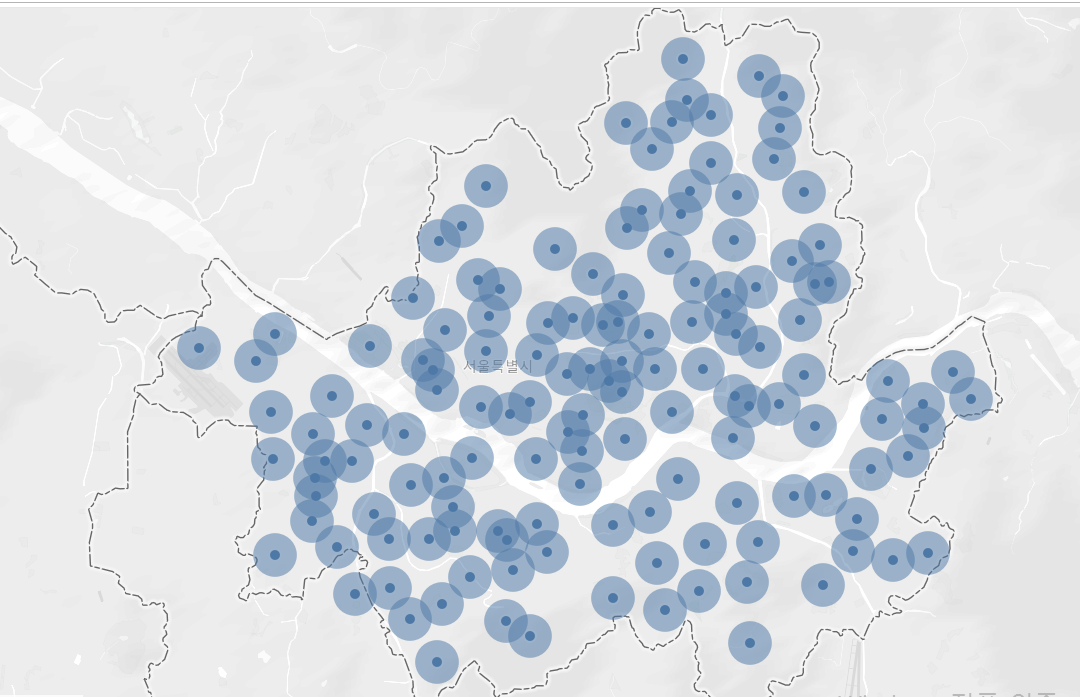

## 서울시 도로구간 위치 정보

#### csv 파일 불러오기

In [10]:
df_street = pd.read_csv('street.csv', encoding='UTF-8')

C:\Users\LEEJUNGEUN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df_street.head(3)

,순서,시군구코드,도로구간일련번호,도로명,도로명코드,영문도로명,고시일자,도로명심의일자,도로제정권자,광역도로구분코드,도로위계기능구분,도로구간종속구분,기점,종점,도로폭,도로길이,기초간격,국도/지방도번호,부여사유,부여일자,이동사유코드,이동사유,이동일자,분기시군구코드,분기도로구간일련번호,입력방법,교차로수,발급여부,위도,경도
0,1,11110,3226,새문안로,3005004,Saemunan-ro,20100422,20100412,시도,2,3,1,신문로1가 74-2,당주동 100-5,40,177,20,,서대문안을 의미하는 새문안의 의미를 인용,20100419,71,도로명기본도위치정확도개선사업에 따른 기재정정,,,0,1,0,,37.570884,126.973331
1,2,11110,3227,옥인6가길,4100210,Ogin 6ga-gil,20100702,20100623,시군구,3,4,1,누상동 166-108,누상동 166-178,3,86,10,,옥인길 일련번호 부여,20100628,71,도로명기본도위치정확도개선사업에 따른 기재정정,,,0,1,0,,37.581420,126.965176
2,3,11110,3229,자하문로,3100012,Jahamun-ro,20100702,20100623,시군구,3,3,2,적선동 8-1,홍지동 99-7,1,29,10,,"조선의 4소문의 하나로 서북간의 소문인 자하문""에서 유래""",20100628,71,도로명기본도위치정확도개선사업에 따른 기재정정,,,0,1,0,,37.586980,126.969095


#### 도로 폭 4m미만 데이터만 추출

In [12]:
df_street = df_street[(df_street['도로폭']<=4)]

In [13]:
df_street = df_street[['시군구코드', '도로폭', '위도', '경도']]

In [14]:
df_street.head(3)

,시군구코드,도로폭,위도,경도
1,11110,3,37.581420,126.965176
2,11110,1,37.586980,126.969095
4,11110,4,37.573648,126.962948


#### csv 파일 생성 및 내보내기

In [18]:
df_street.to_csv('df_street.csv', encoding='cp949')

In [20]:
#### Tabluae에 대충 나타내봄

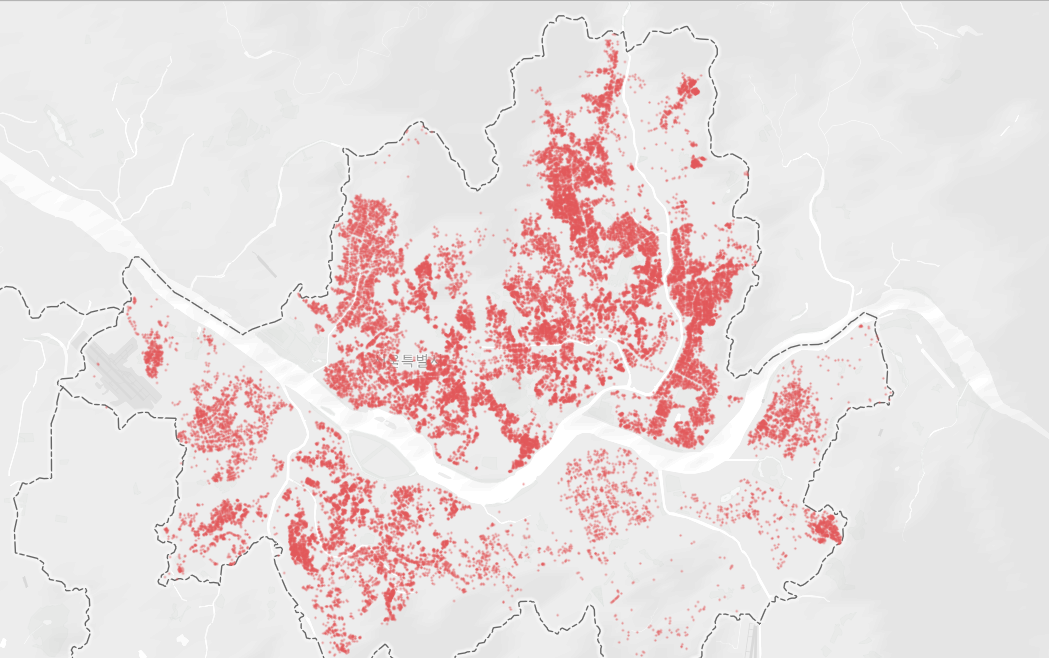

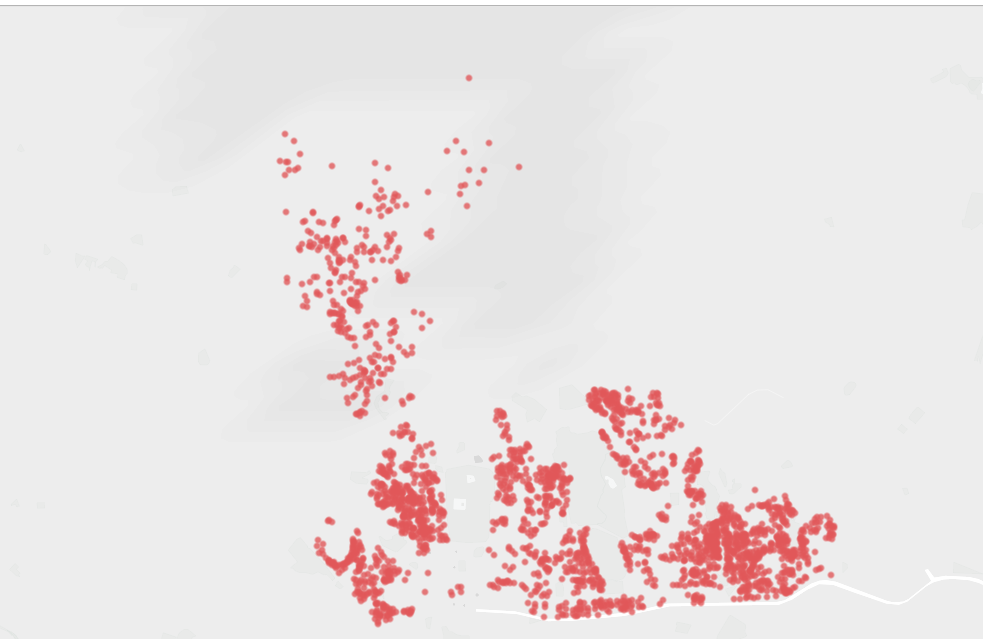

#### 구 별로 보이기도 가능
#### -> 근데 이게 코드로 되어있어서 각 구별 이름 + 중심 좌표 있는 데이터 끌고와서
#### 중간에 이름 찍어주면 더 보기 좋을 것으로 보임

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = (10,10)

In [3]:
build_file = "AL_11_D162_20190906.shp"
build = gpd.read_file(build_file, encoding='euc-kr')

In [6]:
build.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,geometry
0,1975197915054566808200000000,1111018300104540003,1111018300,서울특별시 종로구 평창동,1,일반,454-3,10001,1,일반건축물,2,일반건축물대방,None,0,111104100504,18301,0,00040,00000,None,0,주건축물,0.00,0.00,163.34,0.00,0.00,11,벽돌구조,01000,단독주택,0.0,2,0,None,19750204,0,0.0,2019-09-05,"POLYGON ((197922.3109999998 456679.1040000003,..."
1,0000200430984525926900000000,1111016700100450001,1111016700,서울특별시 종로구 충신동,1,일반,45-1,10004,1,일반건축물,2,일반건축물대방,None,0,111104100222,16701,0,00010,00000,None,0,주건축물,58.55,34.65,34.65,59.18,59.18,51,일반목구조,01000,단독주택,3.2,1,0,None,None,0,0.0,2019-09-05,"POLYGON ((200435.665 452590.7100000009, 200429..."
2,1975196133994556048600000000,1111018500100680001,1111018500,서울특별시 종로구 홍지동,1,일반,68-1,10005,1,일반건축물,2,일반건축물대방,None,0,111104100556,18502,0,00027,00012,None,0,주건축물,0.00,0.00,121.70,0.00,0.00,11,벽돌구조,01000,단독주택,0.0,2,1,None,19751001,0,0.0,2019-09-05,"POLYGON ((196141.5290000001 455603.1840000004,..."
3,1961197171644531060900000000,1111011000100170002,1111011000,서울특별시 종로구 누하동,1,일반,17-2,10008,1,일반건축물,2,일반건축물대방,None,0,111104100302,11002,0,00069,00003,None,0,주건축물,0.00,0.00,64.30,0.00,0.00,11,벽돌구조,04000,제2종근린생활시설,0.0,2,0,None,19610901,0,0.0,2019-09-05,"POLYGON ((197174.7070000004 453103.6659999993,..."
4,1984196878474566020800000000,1111018300105490001,1111018300,서울특별시 종로구 평창동,1,일반,549-1,10009,1,일반건축물,2,일반건축물대방,None,0,111104100492,18301,0,00021,00000,None,0,주건축물,0.00,0.00,255.52,0.00,0.00,11,벽돌구조,01000,단독주택,0.0,2,1,19831107,19840715,0,0.0,2019-09-05,"POLYGON ((196887.2810000004 456602.8100000005,..."


In [7]:
build['A28'].unique()

array(['벽돌구조', '일반목구조', '철근콘크리트구조', '일반철골구조', '경량철골구조', '철골콘크리트구조',
       '철골철근콘크리트구조', '기타콘크리트구조', '기타구조', '블록구조', '기타조적구조', '기타강구조', '석구조',
       '통나무구조', '강파이프구조', '기타철골철근콘크리트구조', None, '프리케스트콘크리트구조', '목구조',
       '조적구조'], dtype=object)